# 3.10 数据透视表

## 3.10.1 演示数据透视表

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3.10.2 手工制作数据透视表

In [4]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [5]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [6]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

## 3.10.3 数据透视表语法

In [7]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


1. 多级数据透视表

In [8]:
age = pd.cut(titanic['age'], [0, 18, 80])

In [9]:
age

0      (18, 80]
1      (18, 80]
2      (18, 80]
3      (18, 80]
4      (18, 80]
5           NaN
6      (18, 80]
7       (0, 18]
8      (18, 80]
9       (0, 18]
10      (0, 18]
11     (18, 80]
12     (18, 80]
13     (18, 80]
14      (0, 18]
15     (18, 80]
16      (0, 18]
17          NaN
18     (18, 80]
19          NaN
20     (18, 80]
21     (18, 80]
22      (0, 18]
23     (18, 80]
24      (0, 18]
25     (18, 80]
26          NaN
27     (18, 80]
28          NaN
29          NaN
         ...   
861    (18, 80]
862    (18, 80]
863         NaN
864    (18, 80]
865    (18, 80]
866    (18, 80]
867    (18, 80]
868         NaN
869     (0, 18]
870    (18, 80]
871    (18, 80]
872    (18, 80]
873    (18, 80]
874    (18, 80]
875     (0, 18]
876    (18, 80]
877    (18, 80]
878         NaN
879    (18, 80]
880    (18, 80]
881    (18, 80]
882    (18, 80]
883    (18, 80]
884    (18, 80]
885    (18, 80]
886    (18, 80]
887    (18, 80]
888         NaN
889    (18, 80]
890    (18, 80]
Name: age, Length: 891, 

In [11]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [12]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
fare = pd.qcut(titanic['fare'], 2)

In [14]:
fare

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
5       (-0.001, 14.454]
6      (14.454, 512.329]
7      (14.454, 512.329]
8       (-0.001, 14.454]
9      (14.454, 512.329]
10     (14.454, 512.329]
11     (14.454, 512.329]
12      (-0.001, 14.454]
13     (14.454, 512.329]
14      (-0.001, 14.454]
15     (14.454, 512.329]
16     (14.454, 512.329]
17      (-0.001, 14.454]
18     (14.454, 512.329]
19      (-0.001, 14.454]
20     (14.454, 512.329]
21      (-0.001, 14.454]
22      (-0.001, 14.454]
23     (14.454, 512.329]
24     (14.454, 512.329]
25     (14.454, 512.329]
26      (-0.001, 14.454]
27     (14.454, 512.329]
28      (-0.001, 14.454]
29      (-0.001, 14.454]
             ...        
861     (-0.001, 14.454]
862    (14.454, 512.329]
863    (14.454, 512.329]
864     (-0.001, 14.454]
865     (-0.001, 14.454]
866     (-0.001, 14.454]
867    (14.454, 512.329]
868     (-0.001, 14.454]
869     (-0.001, 14.454]


In [15]:
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

2. 其他数据透视表选项

In [18]:
# 通过字典为不同的列指定不同的累积函数
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived': sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [19]:
# 当需要计算每一组的总数时，可以通过margins参数来设置
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## 3.10.4 案例：美国人的生日

In [1]:
import pandas as pd

In [2]:
births = pd.read_csv('D:/Python3Space/BookStudy/book3/data/births.csv')

In [3]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
births['decade'] = 10 * (births['year'] // 10)

In [5]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
# 使用seaborn风格
sns.set()

In [12]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').head()

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023


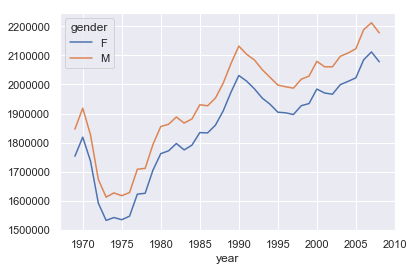

In [13]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()

sigma消除法

In [15]:
import numpy as np

In [16]:
quartiles = np.percentile(births['births'], [25, 50, 75])

In [17]:
quartiles

array([4358. , 4814. , 5289.5])

In [18]:
mu = quartiles[1]

In [19]:
mu

4814.0

In [20]:
sig = 0.74 * (quartiles[2] - quartiles[0])

In [21]:
sig

689.31

In [22]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [23]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [24]:
# 将'day'列设置为整数，由于其中含有缺失值null，因此是字符串
births['day'] = births['day'].astype(int)

In [26]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [28]:
# 从年月日创建一个日期索引
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')

In [29]:
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [30]:
births['dayofweek'] = births.index.dayofweek

In [33]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0, 0.5, 'mean births byu day')

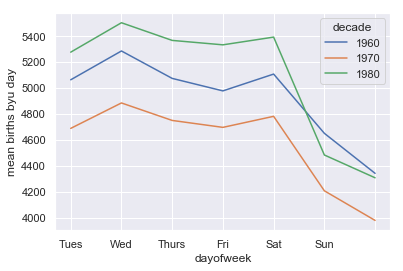

In [37]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births byu day')

In [38]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

In [39]:
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [40]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

In [41]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


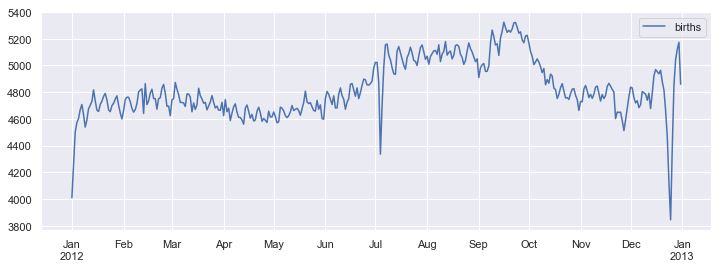

In [45]:
# 将结果画成图
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

3.10完